In [1]:
import pandas as pd
import numpy as np

In [2]:
def makedf(cols, ind):
    data = {c : [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [3]:
a=makedf("AB", [0,1])
a

,A,B
0,A0,B0
1,A1,B1


In [4]:
b=makedf("AB", [2,3])
b

,A,B
2,A2,B2
3,A3,B3


In [5]:
c=makedf("CD", [0,1])
c

,C,D
0,C0,D0
1,C1,D1


In [6]:
d=makedf("BC", [2,3])
d

,B,C
2,B2,C2
3,B3,C3


In [7]:
pd.concat([a,b])   # The default axis is 0

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [8]:
r=pd.concat([a,a])
r

,A,B
0,A0,B0
1,A1,B1
0,A0,B0
1,A1,B1


In [9]:
r.loc[0,"A"]

0    A0
0    A0
Name: A, dtype: object

In [10]:
try:
    pd.concat([a,a], verify_integrity=True)
except ValueError as e:
    import sys
    print(e, file=sys.stderr)

Indexes have overlapping values: Index([0, 1], dtype='int64')


In [11]:
pd.concat([a,a], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


In [12]:
r2=pd.concat([a,a], keys=['first', 'second'])
r2

A   B
first  0  A0  B0
       1  A1  B1
second 0  A0  B0
       1  A1  B1

In [13]:
r2["A"]["first"][0]

'A0'

In [14]:
pd.concat([a,c], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [15]:
pd.concat([a,d], sort=False)    # sort option is used to silence a deprecation message

,A,B,C
0,A0,B0,NaN
1,A1,B1,NaN
2,NaN,B2,C2
3,NaN,B3,C3


In [16]:
pd.concat([a,d], join="inner")

,B
0,B0
1,B1
2,B2
3,B3


In [17]:
df = pd.DataFrame([[1000, "Jack", 21], [1500, "John", 29]], columns=["Wage", "Name", "Age"])
df

,Wage,Name,Age
0,1000,Jack,21
1,1500,John,29


In [18]:
df2 = pd.DataFrame({"Name" : ["John", "Jack"], "Occupation": ["Plumber", "Carpenter"]})
df2

,Name,Occupation
0,John,Plumber
1,Jack,Carpenter


In [19]:
pd.merge(df, df2)

,Wage,Name,Age,Occupation
0,1000,Jack,21,Carpenter
1,1500,John,29,Plumber


In [20]:
df3 = pd.concat([df2, pd.DataFrame({ "Name" : ["James"], "Occupation":["Painter"]})], ignore_index=True)
df3

,Name,Occupation
0,John,Plumber
1,Jack,Carpenter
2,James,Painter


In [21]:
pd.merge(df, df3)                # By default an inner join is computed

,Wage,Name,Age,Occupation
0,1000,Jack,21,Carpenter
1,1500,John,29,Plumber


In [22]:
pd.merge(df, df3, how="outer")   # Outer join

,Wage,Name,Age,Occupation
0,1000.0,Jack,21.0,Carpenter
1,1500.0,John,29.0,Plumber
2,NaN,James,NaN,Painter


In [23]:
books = pd.DataFrame({"Title" : ["War and Peace", "Good Omens", "Good Omens"] , 
                      "Author" : ["Tolstoi", "Terry Pratchett", "Neil Gaiman"]})
books

,Title,Author
0,War and Peace,Tolstoi
1,Good Omens,Terry Pratchett
2,Good Omens,Neil Gaiman


In [24]:
collections = pd.DataFrame([["Oodi", "War and Peace"],
                           ["Oodi", "Good Omens"],
                           ["Pasila", "Good Omens"],
                           ["Kallio", "War and Peace"]], columns=["Library", "Title"])
collections

,Library,Title
0,Oodi,War and Peace
1,Oodi,Good Omens
2,Pasila,Good Omens
3,Kallio,War and Peace


In [25]:
libraries_with_books_by = pd.merge(books, collections)
libraries_with_books_by

,Title,Author,Library
0,War and Peace,Tolstoi,Oodi
1,War and Peace,Tolstoi,Kallio
2,Good Omens,Terry Pratchett,Oodi
3,Good Omens,Terry Pratchett,Pasila
4,Good Omens,Neil Gaiman,Oodi
5,Good Omens,Neil Gaiman,Pasila


In [26]:
wh = pd.read_csv("https://raw.githubusercontent.com/csmastersUH/data_analysis_with_python_2020/master/kumpula-weather-2017.csv")

In [27]:
wh3 = wh.rename(columns={"m": "Month", "d": "Day", "Precipitation amount (mm)" : "Precipitation", 
                         "Snow depth (cm)" : "Snow", "Air temperature (degC)" : "Temperature"})
wh3.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8


In [28]:
groups = wh3.groupby("Month")
groups

In [29]:
len(groups)

12

In [30]:
for key, group in groups:
    print(key, len(group))

1 31
2 28
3 31
4 30
5 31
6 30
7 31
8 31
9 30
10 31
11 30
12 31


In [31]:
groups.get_group(2)                 # Group with index two is February

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
31,2017,2,1,00:00,UTC,1.5,4.0,-0.6
32,2017,2,2,00:00,UTC,0.2,5.0,-0.8
33,2017,2,3,00:00,UTC,-1.0,6.0,-0.2
34,2017,2,4,00:00,UTC,2.7,6.0,0.4
35,2017,2,5,00:00,UTC,-1.0,7.0,-2.5
36,2017,2,6,00:00,UTC,-1.0,7.0,-7.3
37,2017,2,7,00:00,UTC,-1.0,8.0,-12.1
38,2017,2,8,00:00,UTC,-1.0,8.0,-8.8
39,2017,2,9,00:00,UTC,-1.0,8.0,-10.1
40,2017,2,10,00:00,UTC,-1.0,8.0,-8.3


In [32]:
groups["Temperature"]

In [33]:
groups["Temperature"].mean()

Month
1     -2.316129
2     -2.389286
3      0.983871
4      2.676667
5      9.783871
6     13.726667
7     16.035484
8     16.183871
9     11.826667
10     5.454839
11     3.950000
12     1.741935
Name: Temperature, dtype: float64

In [34]:
groups["Precipitation"].sum()

Month
1      26.9
2      21.0
3      29.7
4      26.9
5      -5.9
6      59.3
7      14.2
8      70.1
9      51.2
10    173.5
11    117.2
12    133.6
Name: Precipitation, dtype: float64

In [35]:
wh4 = wh3.copy()
wh4.loc[wh4.Precipitation == -1, "Precipitation"] = 0
wh4.loc[wh4.Snow == -1, "Snow"] = 0
wh4.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
0,2017,1,1,00:00,UTC,0.0,0.0,0.6
1,2017,1,2,00:00,UTC,4.4,0.0,-3.9
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5
3,2017,1,4,00:00,UTC,0.0,13.0,-12.8
4,2017,1,5,00:00,UTC,0.0,10.0,-17.8


In [36]:
wh4.groupby("Month")["Precipitation"].sum()

Month
1      38.9
2      35.0
3      41.7
4      39.9
5      16.1
6      76.3
7      31.2
8      86.1
9      65.2
10    184.5
11    120.2
12    140.6
Name: Precipitation, dtype: float64

In [37]:
def myfilter(df):                                     # The filter function must return a boolean value
    return df["Precipitation"].sum() >= 150

wh4.groupby("Month").filter(myfilter)                 # Filter out months with total precipitation less that 150 mm

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature
273,2017,10,1,00:00,UTC,0.0,0.0,9.1
274,2017,10,2,00:00,UTC,6.4,0.0,9.2
275,2017,10,3,00:00,UTC,21.5,0.0,8.3
276,2017,10,4,00:00,UTC,12.7,0.0,11.2
277,2017,10,5,00:00,UTC,0.6,0.0,8.8
278,2017,10,6,00:00,UTC,0.7,0.0,7.7
279,2017,10,7,00:00,UTC,11.7,0.0,8.1
280,2017,10,8,00:00,UTC,14.1,0.0,9.3
281,2017,10,9,00:00,UTC,18.3,0.0,8.6
282,2017,10,10,00:00,UTC,24.2,0.0,8.1


In [38]:
pd.concat([wh4.iloc[:, 0:3], 
           wh4.groupby("Month")[["Precipitation", "Snow", "Temperature"]].transform(lambda x : x - x.mean())], 
          axis=1)

,Year,Month,Day,Precipitation,Snow,Temperature
0,2017,1,1,-1.254839,-6.903226,2.916129
1,2017,1,2,3.145161,-6.903226,-1.583871
2,2017,1,3,5.345161,0.096774,-4.183871
3,2017,1,4,-1.254839,6.096774,-10.483871
4,2017,1,5,-1.254839,3.096774,-15.483871
...,...,...,...,...,...,...
360,2017,12,27,-3.435484,-1.483871,2.058065
361,2017,12,28,-0.835484,-1.483871,1.058065
362,2017,12,29,3.264516,-1.483871,2.058065
363,2017,12,30,-0.435484,-1.483871,0.758065


In [39]:
wh4.groupby("Month").apply(lambda df : df.sort_values("Temperature"))

Year  Month  Day   Time Time zone  Precipitation  Snow  Temperature
Month                                                                         
1     4    2017      1    5  00:00       UTC            0.0  10.0        -17.8
      5    2017      1    6  00:00       UTC            0.3  10.0        -17.8
      3    2017      1    4  00:00       UTC            0.0  13.0        -12.8
      2    2017      1    3  00:00       UTC            6.6   7.0         -6.5
      15   2017      1   16  00:00       UTC            0.0   8.0         -4.2
...         ...    ...  ...    ...       ...            ...   ...          ...
12    360  2017     12   27  00:00       UTC            1.1   0.0          3.8
      362  2017     12   29  00:00       UTC            7.8   0.0          3.8
      342  2017     12    9  00:00       UTC            0.2   0.0          4.2
      336  2017     12    3  00:00       UTC            7.2   0.0          5.0
      341  2017     12    8  00:00       UTC            2.0   0.0          5.2

[365 rows x 8 columns]

In [40]:
s="\u2212" "5"   # unicode minus sign and five
print(s)
try:
    float(s)
except ValueError as e:
    import sys
    print(e, file=sys.stderr)
        

−5


could not convert string to float: '−5'


In [41]:
float(s.replace("\u2212", "-"))

-5.0

In [42]:
wh2 = wh3.copy()
wh2.columns

Index(['Year', 'Month', 'Day', 'Time', 'Time zone', 'Precipitation', 'Snow',
       'Temperature'],
      dtype='object')

In [43]:
wh2["Date"] = pd.to_datetime(wh2[["Year", "Month", "Day"]])
wh2.head()

,Year,Month,Day,Time,Time zone,Precipitation,Snow,Temperature,Date
0,2017,1,1,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,2017,1,2,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,2017,1,3,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,2017,1,4,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,2017,1,5,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


In [44]:
wh2=wh2.drop(columns=["Year", "Month", "Day"])
wh2.head()

,Time,Time zone,Precipitation,Snow,Temperature,Date
0,00:00,UTC,-1.0,-1.0,0.6,2017-01-01
1,00:00,UTC,4.4,-1.0,-3.9,2017-01-02
2,00:00,UTC,6.6,7.0,-6.5,2017-01-03
3,00:00,UTC,-1.0,13.0,-12.8,2017-01-04
4,00:00,UTC,-1.0,10.0,-17.8,2017-01-05


In [45]:
wh2 = wh2.set_index("Date")
wh2.head()

,Time,Time zone,Precipitation,Snow,Temperature
Date,,,,,
2017-01-01,00:00,UTC,-1.0,-1.0,0.6
2017-01-02,00:00,UTC,4.4,-1.0,-3.9
2017-01-03,00:00,UTC,6.6,7.0,-6.5
2017-01-04,00:00,UTC,-1.0,13.0,-12.8
2017-01-05,00:00,UTC,-1.0,10.0,-17.8


In [46]:
wh2["2017-01-15":"2017-02-03"]

,Time,Time zone,Precipitation,Snow,Temperature
Date,,,,,
2017-01-15,00:00,UTC,-1.0,8.0,-2.8
2017-01-16,00:00,UTC,-1.0,8.0,-4.2
2017-01-17,00:00,UTC,0.2,8.0,-3.5
2017-01-18,00:00,UTC,0.9,8.0,1.1
2017-01-19,00:00,UTC,-1.0,5.0,1.6
2017-01-20,00:00,UTC,0.3,5.0,-0.6
2017-01-21,00:00,UTC,0.4,5.0,-1.8
2017-01-22,00:00,UTC,0.2,5.0,1.0
2017-01-23,00:00,UTC,0.1,6.0,0.1


In [47]:
r=pd.date_range("2017-07-01", "2017-07-31", freq="w-mon")
r

DatetimeIndex(['2017-07-03', '2017-07-10', '2017-07-17', '2017-07-24',
               '2017-07-31'],
              dtype='datetime64[ns]', freq='W-MON')

In [48]:
wh2.index.difference(r)

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=360, freq=None)

In [49]:
wh2.loc[r,:]

,Time,Time zone,Precipitation,Snow,Temperature
2017-07-03,00:00,UTC,2.2,-1.0,14.5
2017-07-10,00:00,UTC,-1.0,-1.0,18.0
2017-07-17,00:00,UTC,2.7,-1.0,15.4
2017-07-24,00:00,UTC,-1.0,-1.0,15.7
2017-07-31,00:00,UTC,0.1,-1.0,17.8


In [50]:
pd.date_range("2017-07-01", "2017-07-31", freq="b")

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21', '2017-07-24',
               '2017-07-25', '2017-07-26', '2017-07-27', '2017-07-28',
               '2017-07-31'],
              dtype='datetime64[ns]', freq='B')

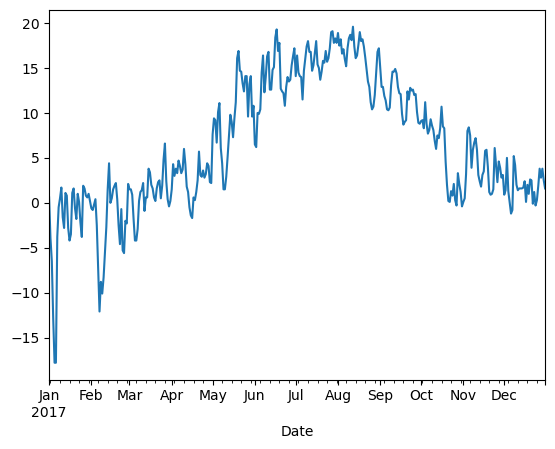

In [51]:
%matplotlib inline
wh2["Temperature"].plot();

In [52]:
rolling = wh2.Temperature.rolling(30, center=True)
rolling

Rolling [window=30,center=True,axis=0,method=single]

In [53]:
Rolling [window=30,center=True,axis=0]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1694940557.py, line 1)

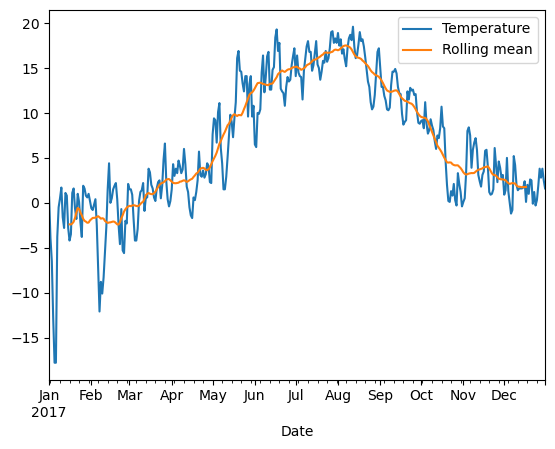

In [54]:
data = pd.DataFrame({"Temperature" : wh2.Temperature, "Rolling mean" : rolling.mean()})
data.plot();